## Задание 3

Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность.

In [1]:
import keras # Импорт библиотеки Keras, которая является высокоуровневым интерфейсом для работы с нейронными сетями.
from keras.layers import * # Импорт всех слоев нейронных сетей из модуля layers в Keras. Звездочка * означает, что импортируются все доступные слои.
import matplotlib.pyplot as plt # Импорт модуля pyplot из библиотеки matplotlib для построения графиков.
import numpy as np # Импорт библиотеки numpy, которая предоставляет функциональность для работы с многомерными массивами и матрицами.
import keras.utils # Импорт модуля utils из Keras, который содержит утилиты для работы с данными.

## Обучение и тестирование модели

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data() # выполняет загрузку данных из датасета Fashion MNIST и их разделение на обучающий и тестовый наборы.

#(x_train, y_train), (x_test, y_test): Эта часть кода используется для присваивания результата загрузки данных четырем переменным:

# x_train: набор обучающих изображений
# y_train: метки классов для обучающих изображений
# x_test: набор тестовых изображений
# y_test: метки классов для тестовых изображений
# В данном случае данные разделены на две пары: обучающий и тестовый наборы.

# keras.datasets.fashion_mnist.load_data(): Это метод load_data() из модуля fashion_mnist в Keras, который загружает данные из датасета Fashion MNIST.

# Fashion MNIST - это датасет, аналогичный классическому датасету рукописных цифр MNIST, но содержащий изображения одежды и аксессуаров вместо цифр.

# Этот метод возвращает четыре переменных: два кортежа, каждый из которых содержит обучающие и тестовые данные, и соответствующие им метки классов.

# Таким образом, эта строка загружает данные из датасета Fashion MNIST и разделяет их на обучающий и тестовый наборы, которые можно использовать для обучения и оценки нейронных сетей.

In [3]:
# Нормализуем данные (все данные в массиве, делим на 255)
x_train = x_train / 255
x_test = x_test / 255

In [4]:
x_train.shape

# используется для получения размерности массива x_train, который содержит обучающие изображения.

# x_train: Это массив, содержащий обучающие изображения. В данном контексте он представляет собой трехмерный массив, где каждый элемент представляет собой отдельное изображение.

# .shape: Это атрибут, который позволяет получить размерность массива x_train. Возвращает кортеж, где каждый элемент представляет размерность массива в соответствующем измерении.

# В данном случае, x_train.shape возвращает размерность массива x_train, то есть количество изображений, высоту каждого изображения и ширину каждого изображения.

# Например, если x_train.shape возвращает (60000, 28, 28), это означает, что x_train содержит 60 000 изображений, каждое из которых имеет размер 28x28 пикселей.

# Таким образом, строка x_train.shape используется для получения размерности массива обучающих изображений, что может быть полезно для проверки размерности данных перед их использованием в нейронных сетях или других алгоритмах машинного обучения.

(60000, 28, 28)

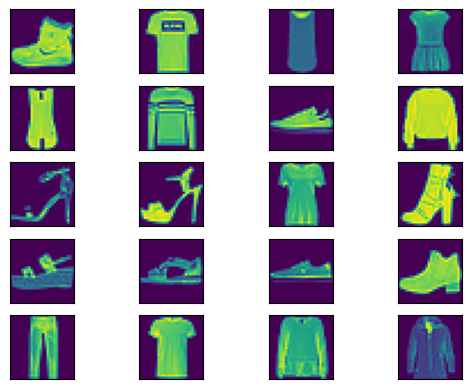

In [5]:
# Посмотрим, что за данные мы загрузили
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(x_train[i])
    # Убираем подписи к осям рисунков
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
# Делаем категоризацию - преобразовывает вектор класса (целые числа) в двоичную матрицу класса
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [7]:
# Задаем входной формат данных для модели
input_shape = (28, 28, 1)

In [8]:
# Создаем модель Keras - последовательная модель Sequential
model = keras.Sequential([
    keras.Input(shape=input_shape),   # устанавливаем входной формат данных
    Conv2D(64, padding='same', kernel_size = (3, 3), activation = 'relu'), # Задаем число фильтров (64) и размер матрицы свертывания (3x3)
    MaxPooling2D((2, 2), strides = 2), # Задаем размер квадратика при свертывании MaxPool (2x2)
    Conv2D(256, padding='same', kernel_size = (3, 3), activation = 'relu'), # Задаем число фильтров (256) и размер матрицы свертывания (3x3)
    MaxPooling2D((2, 2), strides = 2), # Задаем размер квадратика при свертывании MaxPool (2x2)
    Flatten(),                        # сглаживание
    Dense(128, activation = 'relu'),   # Слой нейронной сети из 128 нейронов и функцией активации 'relu'
    Dense(10, activation = 'softmax') # Слой нейронной сети из 10 нейронов и функцией активации 'softmax'
    ])

In [9]:
# Компилируем модель
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
%%time
# Обучение и сохранение истории обучения с одновременной оценкой на тестовых данных
history = model.fit(x_train, y_train_cat, batch_size = 128, epochs = 10, validation_data =(x_test, y_test_cat))

Epoch 1/10
469/469 [==============================] - 14s 19ms/step - loss: 0.4162 - accuracy: 0.8507 - val_loss: 0.3217 - val_accuracy: 0.8828
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2628 - accuracy: 0.9051 - val_loss: 0.2665 - val_accuracy: 0.9046
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2189 - accuracy: 0.9203 - val_loss: 0.2457 - val_accuracy: 0.9134
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1896 - accuracy: 0.9301 - val_loss: 0.2305 - val_accuracy: 0.9215
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1619 - accuracy: 0.9392 - val_loss: 0.2356 - val_accuracy: 0.9156
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1394 - accuracy: 0.9491 - val_loss: 0.2455 - val_accuracy: 0.9156
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1179 - accuracy: 0.9568 - val_loss: 0.2424 - val_accuracy: 0.921

## Отрисовка точности модели

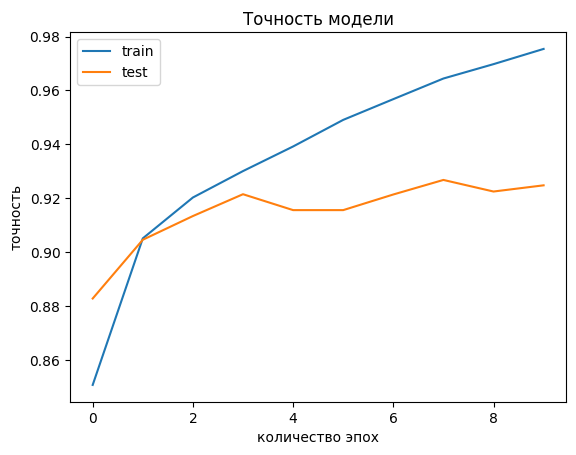

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Отрисовка потерь модели

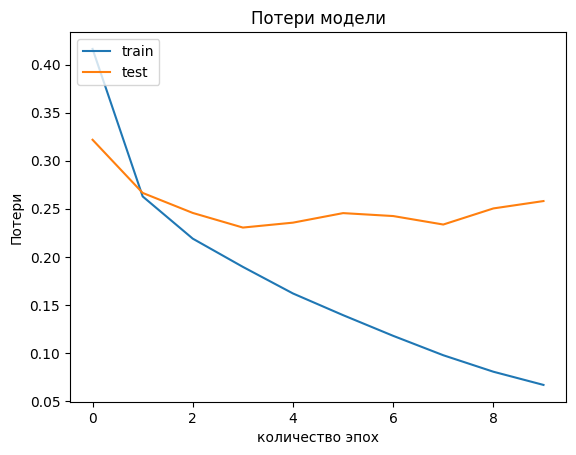

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Оцениваем работу модели

In [13]:
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f'loss, accuracy: {loss}, {accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2580 - accuracy: 0.9248
loss, accuracy: 0.2580246329307556, 0.9247999787330627


In [14]:
# Смотрим архитектуру модели (слои, параметры, нейроны)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       147712    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 256)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

## Вывод:
#### На занятии лучшие результаты по val_accuracy были чуть больше 0.91.
#### Во время подготовки домашнего задания увеличила количество слоев в сверточном слое, batch_size (в конечном итоге до 128) результаты val_accuracy улучшились (0.9248). Однако скорость обучения модели снизилась.
#### Изменение количества эпох после 10 ухудшает результаты.